In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from scipy.signal import argrelextrema

plt.rc('figure', figsize=[13,7]) #Diagramm size
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

In [3]:
def sort_eigenValues(A,absolute=False): #Sorting eigenvalues
    eigenValues, eigenVectors = np.linalg.eigh(A)
    if absolute==True:
        idx = np.argsort(abs(eigenValues))
    if absolute==False:
        idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return [eigenValues,eigenVectors]

h_bar = 1.0545718*10**-34 #hbar
m_e   = 9.10938356*10**-31 #m_e
mu_b  = 9.274009994*10**-24 #mu_b
x0    = 1.22085284*10**-38 #hbar^2/m_e
x1    = 1.60218*10**-22 #meV
J_to_meV = 1/x1
x2    = 1.60218*10**-29 #eVÅ
x3    = 1*10*-6 #mum
x4    = 10**7 #k

In [37]:
def H_Kitaev(mu,N): #Kitaev Hamiltonian
    X = np.zeros((2*N,2*N))
    for x in range(N):
        X[2*x][2*x] = -mu
        X[2*x+1][2*x+1] = mu
        if x<N-1:
            X[2*x+2][2*x] = -1
            X[2*x+3][2*x] = 1
            X[2*x+2][2*x+1] = -1
            X[2*x+3][2*x+1] = 1
            X[2*x][2*x+2] = -1
            X[2*x][2*x+3] = 1
            X[2*x+1][2*x+2] = -1
            X[2*x+1][2*x+3] = 1
    return X

def Plot_E_Kitaev(N,start, end, steps):#Plot energiespectrum Kitaev chain
    X = np.linspace(start,end,steps)
    Y = [sort_eigenValues(H_Kitaev(X[i],N))[0] for i in range(steps)]
    for x in range(2*N):
        plt.plot(X,[Y[i][x] for i in range(steps)],c='k')
    plt.xlabel('μ / t')
    plt.ylabel('E / t')
    plt.ylim(-3,3)
    plt.show()
    
def Plot_wf_Kitaev(mu_t,N):#Plot wavefunction Kitaev chain
    ev, evec = sort_eigenValues(H_Kitaev(mu_t,N),absolute=True)
    wf1 = (np.linalg.norm(evec[:, 0].reshape(-1, 2), axis=1)) ** 2
    wf2 = (np.linalg.norm(evec[:, 1].reshape(-1, 2), axis=1)) ** 2
    plt.plot([i+1 for i in range(len(wf1))],wf1,'-r')
    plt.plot([i+1 for i in range(len(wf2))],wf2,'--b')
    plt.xlabel('n')
    plt.ylabel("$|\psi|^2$")
    plt.legend(['μ/t = %.1f'%mu_t,'N    = %d'%N],loc="lower left",handlelength=0)
    plt.show()
    
def Plot_wf_3d_Kitaev(N,start,end,steps):
    fig = plt.figure()    
    ax = plt.axes(projection="3d")
    mu_t=np.linspace(start,end,steps)
    n=[i+1 for i in range(N)]
    X, Y = np.meshgrid(mu_t, n)
    Z = np.zeros((N,steps))
    for y in range(steps):
        ev, evec = sort_eigenValues(H_Kitaev(mu_t[y],N),absolute=True)
        wf = (np.linalg.norm(evec[:, 0].reshape(-1, 2), axis=1)) ** 2 + (np.linalg.norm(evec[:, 1].reshape(-1, 2), axis=1)) ** 2
        for x in range(N):
            Z[x,y] = wf[x]
    ax.plot_surface(X, Y, Z, cmap='coolwarm',linewidth=0)
    ax.view_init(50,40)
    ax.set_xlabel('$\mu/t$')
    ax.set_ylabel('n')
    ax.set_zlabel('$|\Psi|^2$')
    plt.show()

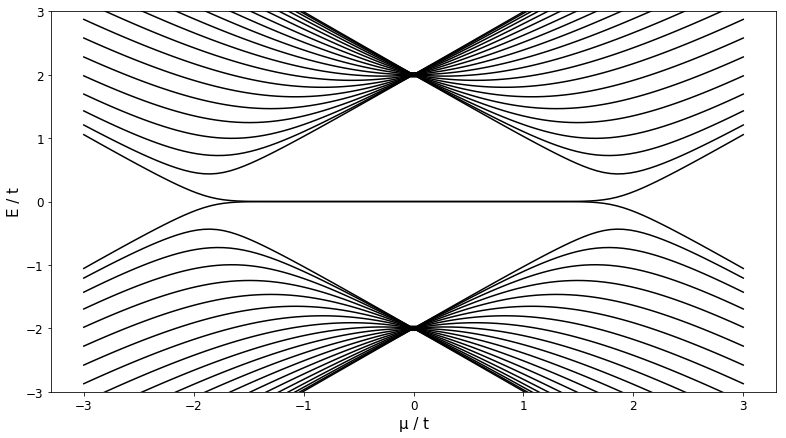

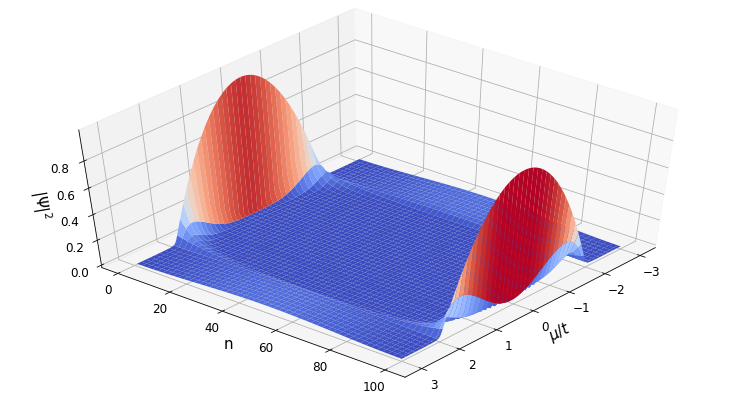

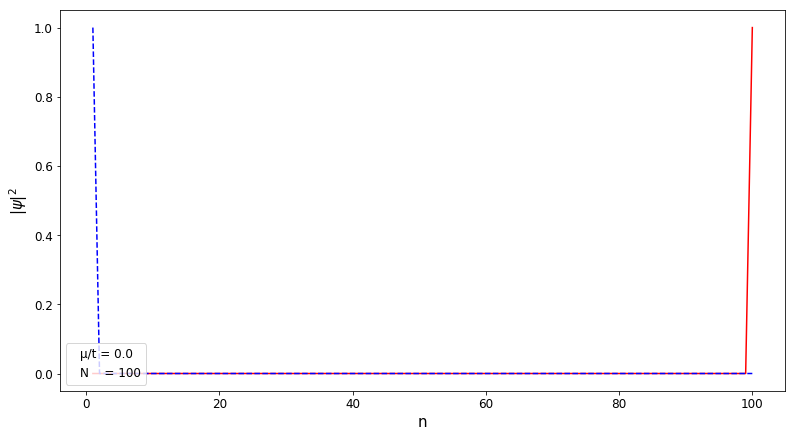

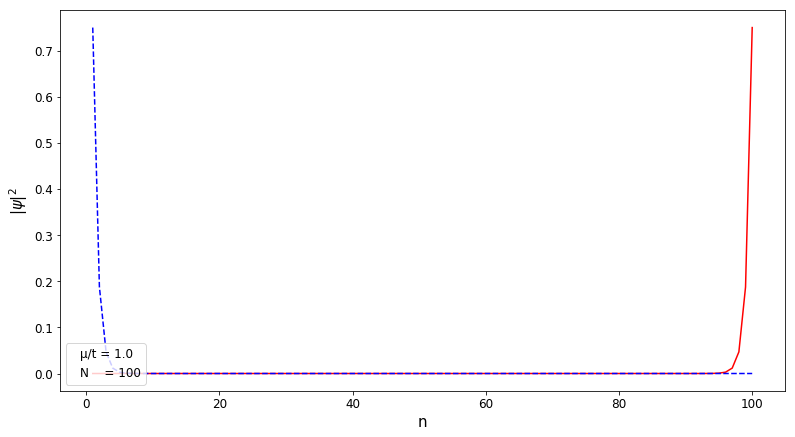

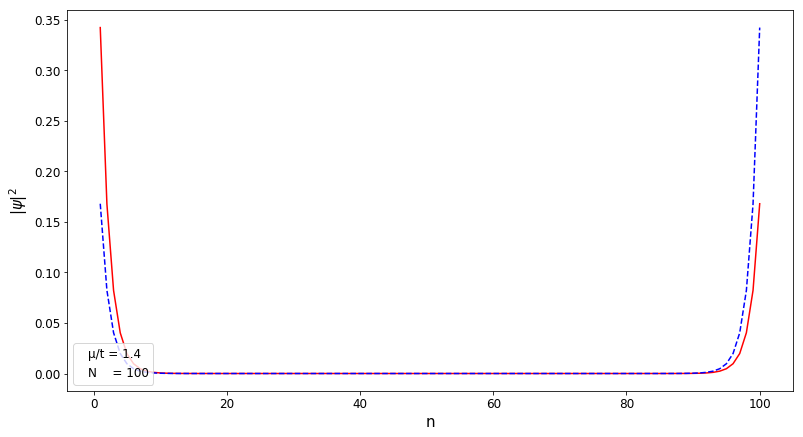

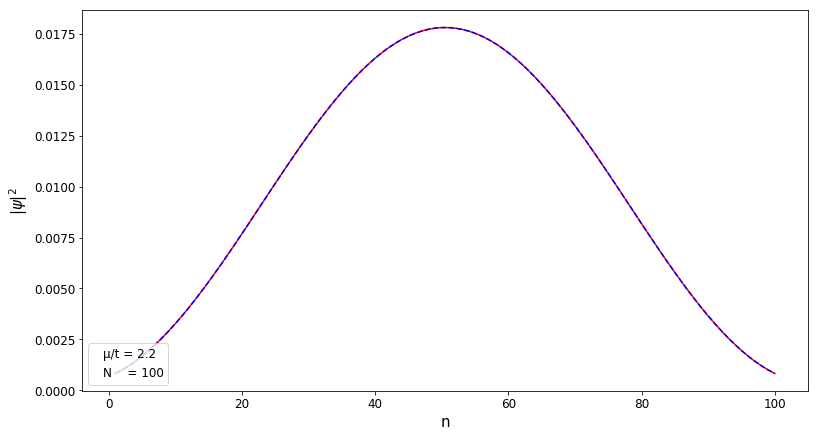

In [38]:
Plot_E_Kitaev(N=20,start=-3, end=3, steps=100)
Plot_wf_3d_Kitaev(100,-3,3,1000)
Plot_wf_Kitaev(mu_t=0,N=100)
Plot_wf_Kitaev(mu_t=1,N=100)
Plot_wf_Kitaev(mu_t=1.4,N=100)
Plot_wf_Kitaev(mu_t=2.2,N=100)

In [63]:
def H2(m,g,B,delta,alpha,mu,wire_length,N):
    t=h_bar**2/(2*m)
    a=wire_length/N
    H = np.zeros((4*(N-2),4*(N-2)))
    for x in range(N-2):
        H[4*x,4*x]=2*t/a**2-mu+B*g*mu_b
        H[4*x+2,4*x+2]=-2*t/a**2+mu+B*g*mu_b
        H[4*x,4*x+2]=delta
        H[4*x+2,4*x]=delta
        H[4*x+1,4*x+1]=2*t/a**2-mu-B*g*mu_b
        H[4*x+3,4*x+3]=-2*t/a**2+mu-B*g*mu_b
        H[4*x+1,4*x+3]=delta
        H[4*x+3,4*x+1]=delta
        if x<N-3:
            H[4*(x+1),4*x]=-t/a**2
            H[4*x+2,4*(x+1)+2]=-t/a**2
            H[4*x,4*(x+1)]=t/a**2
            H[4*(x+1)+2,4*x+2]=t/a**2
            H[4*(x+1)+1,4*x+1]=-t/a**2
            H[4*x+3,4*(x+1)+3]=-t/a**2
            H[4*x+1,4*(x+1)+1]=t/a**2
            H[4*(x+1)+3,4*x+3]=t/a**2
            H[4*(x+1),4*x+1] = -alpha/(2*a)
            H[4*(x+1)+1,4*x] = alpha/(2*a)
            H[4*x+1,4*(x+1)] = -alpha/(2*a)
            H[4*x,4*(x+1)+1] = alpha/(2*a)
            H[4*(x+1)+2,4*x+3] = alpha/(2*a)
            H[4*(x+1)+3,4*x+2] = -alpha/(2*a)
            H[4*x+3,4*(x+1)+2] = alpha/(2*a)
            H[4*x+2,4*(x+1)+3] = -alpha/(2*a)
    return H

def Plot_E_H2_delta(m,g,B,start_delta,end_delta,steps_delta,
              alpha,mu,wire_length,N,only_lowest_E=False):
    X=np.linspace(start_delta,end_delta,steps_delta)
    Y=np.zeros((steps_delta,4*(N-2)))
    for x in range(steps_delta):
        ev, evec = sort_eigenValues(H2(m,g,B,X[x],alpha,mu,
                                       wire_length,N))
        Y[x][:] = ev
    Y=Y.transpose()
    if only_lowest_E==True:
        plt.plot(X*J_to_meV,Y[2*(N-2)-1][:]*J_to_meV, 'k')
        plt.plot(X*J_to_meV,Y[2*(N-2)][:]*J_to_meV, 'k')
        d=np.sqrt(abs((g*mu_b*B)**2-(mu)**2))*J_to_meV
        m=max(abs(Y[2*(N-2)][:]))*J_to_meV
        plt.vlines(x=d, ymin=-m, ymax=m, 
                   color = 'b',linestyles='dashed',
                   label='$\sqrt{(g\mu_BB)^2-\mu^2}$')
        plt.legend()
    else:
        for x in range(4*(N-2)):
            plt.plot(X*J_to_meV,Y[x][:]*J_to_meV, 'k',
                     linewidth=0.6)
    plt.xlabel('$\Delta$ [meV]')
    plt.ylabel('E [meV]')
    plt.show()
    
def Plot_E_H2(m,g,B,delta,alpha,mu,wire_length,N,
              only_lowest_E=False):
    ev, evec = sort_eigenValues(H2(m,g,B,delta,alpha,
                                   mu,wire_length,N))
    X=[i+1 for i in range(len(ev))]
    if only_lowest_E==True:
        plt.plot(X,ev*J_to_meV,'ko')
        plt.xlabel('# eigenvalue')
        plt.ylabel('E [meV]')
        plt.xlim(2*(N-2)-10,2*(N-2)+11)
        ticks=[2*i+2*(N-2)-10 for i in range(11)]
        plt.xticks(ticks)
        plt.ylim(-0.3,0.3)
        plt.show()
    else:
        plt.plot(X,ev*J_to_meV,'ko',markersize=0.5)
        plt.xlabel('# eigenvalue')
        plt.ylabel('E [meV]')
        plt.show()       

def Plot_E_H2_convergence(m,g,B,delta,alpha,mu,wire_length,start_N,end_N,steps_N,only_lowest_E=False):
    X=np.linspace(start_N,end_N,steps_N, dtype='int')
    Y=np.zeros((4,steps_N))
    for x in range(steps_N):
        ev, evec = sort_eigenValues(H2(m,g,B,delta,alpha,mu,wire_length,X[x]))
        Y[0][x]=ev[2*(X[x]-2)-1]*J_to_meV
        Y[1][x]=ev[2*(X[x]-2)]*J_to_meV
        Y[2][x]=ev[2*(X[x]-2)-2]*J_to_meV
        Y[3][x]=ev[2*(X[x]-2)+1]*J_to_meV
    if only_lowest_E==True:
        plt.plot(X,Y[0]*1e13)
        plt.plot(X,Y[1]*1e13)
        plt.ylim(-1,1)
        plt.xlabel('N')
        plt.ylabel('E [$10^{-13}$ meV]')
        plt.show()
    else:
        plt.plot(X,Y[0])
        plt.plot(X,Y[1])
        plt.plot(X,Y[2])
        plt.plot(X,Y[3])
        plt.xlabel('N')
        plt.ylabel('E [meV]')
        plt.show()
    
def Plot_wf_H2(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False):
    ev, evec = sort_eigenValues(H2(m,g,B,delta,alpha,mu,wire_length,N))
    X=np.linspace(0,wire_length*1e6,N)
    wf1=(np.linalg.norm(evec[:, 2*(N-2)].reshape(-1, 4), axis=1)) ** 2
    wf1=np.append([0],wf1)
    wf1=np.append(wf1,[0])
    wf2=(np.linalg.norm(evec[:, 2*(N-2)-1].reshape(-1, 4), axis=1)) ** 2
    wf2=np.append([0],wf2)
    wf2=np.append(wf2,[0])
    if log_scale==True:
        plt.yscale('log')
        plt.ylim(10e-21,1)
    plt.plot(X,wf1,'b')
    plt.plot(X,wf2,'r')
    plt.xlabel('x [$\mu$m]')
    plt.ylabel('E [meV]')
    plt.show()
    
def Plot_wf_H2_3d(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N):
    fig = plt.figure()    
    ax = plt.axes(projection="3d")
    D=np.linspace(start_delta,end_delta,steps_delta)
    X=np.linspace(0,wire_length*10e4,N)
    X, Y = np.meshgrid(D*J_to_meV, X)
    Z = np.zeros((N,steps_delta))
    for y in range(steps_delta):
        ev, evec = sort_eigenValues(H2(m,g,B,D[y],alpha,mu,wire_length,N))
        wf1=(np.linalg.norm(evec[:, 2*(N-2)].reshape(-1, 4), axis=1)) ** 2
        wf1=np.append(wf1[0],wf1)
        wf1=np.append(wf1,wf1[N-2])
        wf2=(np.linalg.norm(evec[:, 2*(N-2)-1].reshape(-1, 4), axis=1)) ** 2
        wf2=np.append(wf2[0],wf2)
        wf2=np.append(wf2,wf2[N-2])
        for x in range(N):
            Z[x,y] = wf1[x]+wf2[x]
    ax.plot_surface(X, Y, Z, cmap='coolwarm',linewidth=0)
    ax.view_init(50,40)
    ax.set_xlabel('$\Delta$ [meV]')
    ax.set_ylabel('x [$\mu$m]')
    ax.set_zlabel('$|\Psi|^2$')
    plt.show()

def Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='sin_and_exp'):
    ev, evec = sort_eigenValues(H2(m,g,B,delta,alpha,mu,wire_length,N))
    X=np.linspace(0,wire_length*1e6,N)
    wf=(np.linalg.norm(evec[:, 2*(N-2)].reshape(-1, 4), axis=1)) ** 2
    wf=np.append([0],wf)
    wf=np.append(wf,[0])
    maximums = argrelextrema(wf, np.greater)[0]
    minimums = argrelextrema(wf, np.less)[0]
    wf_max=[wf[x] for x in maximums]
    log_wf_max=np.log(wf_max)
    avg=np.average([(log_wf_max[x+1]-log_wf_max[x])/(maximums[x+1]-maximums[x])*100 for x in range(len(log_wf_max)-1)][-20:])
    ydiff=np.average((log_wf_max-avg*maximums/100)[-20:])
    freq=np.average([(minimums[x+1]-minimums[x])/100 for x in range(len(minimums)-1)][-20:])
    if plot=='exp':
        plt.plot(X,np.exp(avg*X+ydiff),'--k',label='f(x) = exp(%.3f x - %.3f)'%(avg,-ydiff))
    if plot=='sin':
        plt.plot(X,np.sin(np.pi/freq*(X-10))**2*0.05,'--k',label='f(x) = 0.05 * sin^2(%.3f x)'%freq)
    if plot=='sin_and_exp':
        plt.plot(X,np.sin(np.pi/freq*(X-10))**2*np.exp(avg*X+ydiff),'--k',label='$f(x) = \sin^2(%.3f x) * \exp(%.3f x - %.3f)$'%(freq,avg,-ydiff))
    plt.plot(X,wf,'b')
    plt.legend(loc="upper left")
    plt.xlabel('x [$\mu$m]')
    plt.ylabel('E [meV]')   
    if log_scale==True:
        plt.xlim(5,10)
        plt.yscale('log')
    if log_scale==False:
        plt.xlim(9,10)
    plt.show()

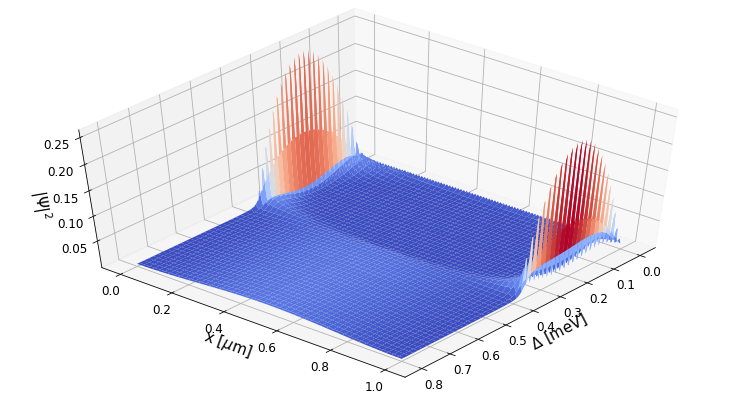

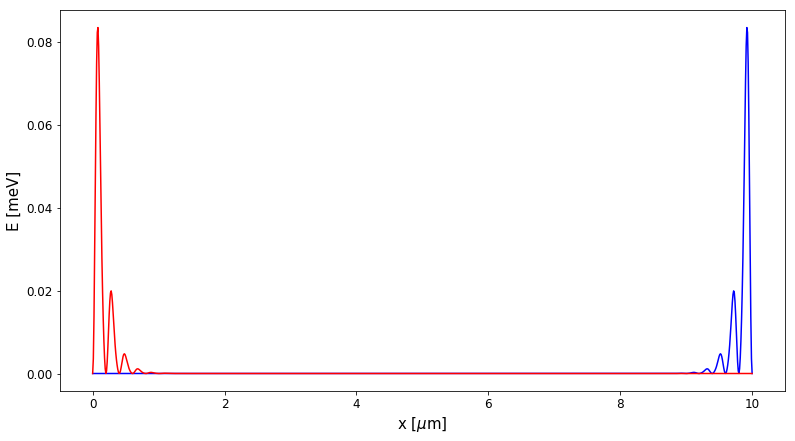

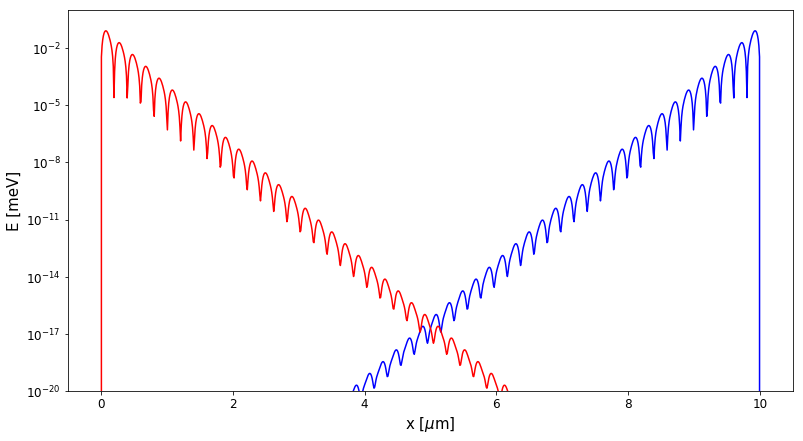

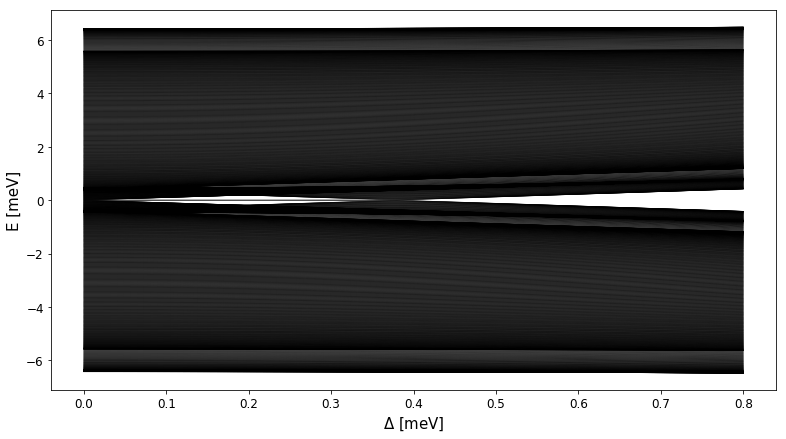

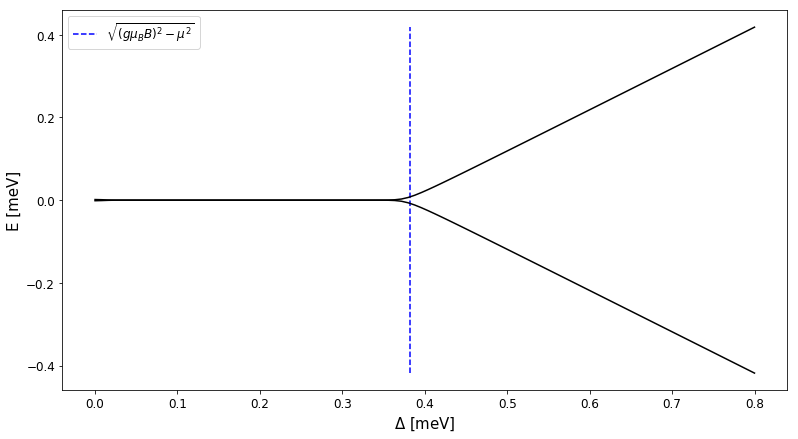

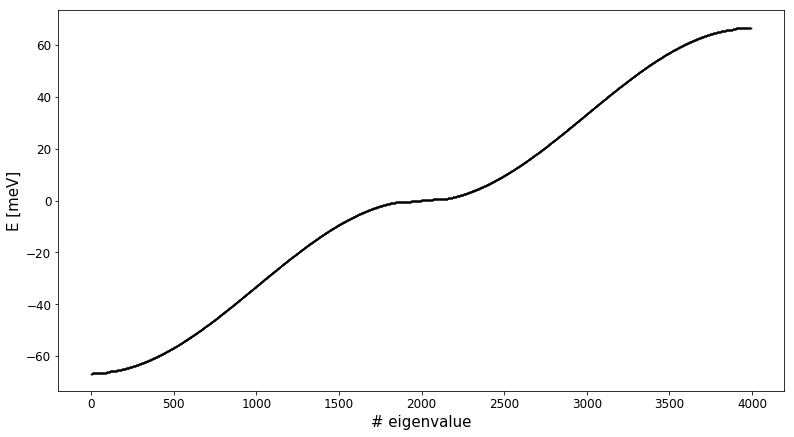

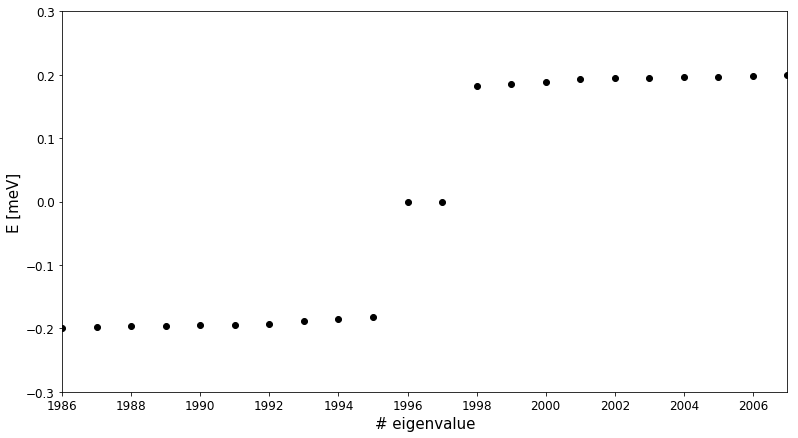

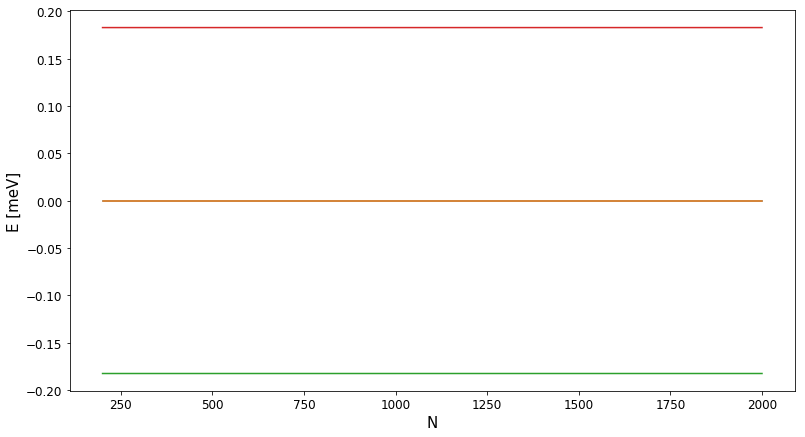

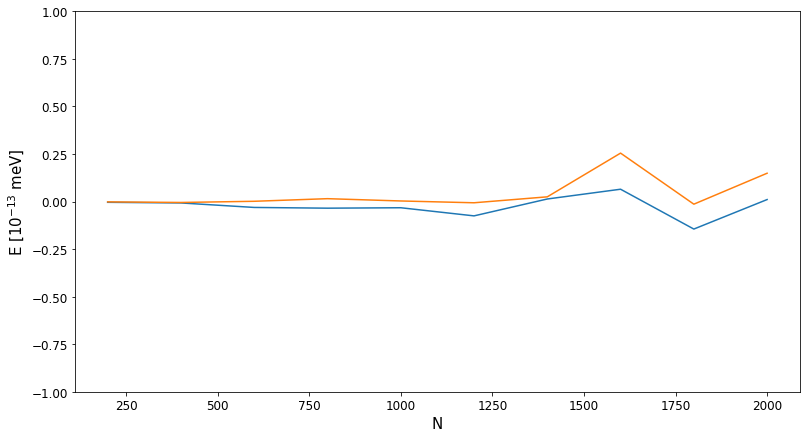

In [40]:
#InAs
m=0.023*m_e
g=12
B=0.55
start_delta=0
end_delta=0.8*x1
steps_delta=100
alpha=0.5*x2
mu=0
wire_length=10e-6
start_N=200
end_N=2000
steps_N=10
delta=0.2*x1

N=300
Plot_wf_H2_3d(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N)
N=1000
Plot_wf_H2(m,g,B,delta,alpha,mu,wire_length,N)
Plot_wf_H2(m,g,B,delta,alpha,mu,wire_length,N,True)
N=300
Plot_E_H2_delta(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N,only_lowest_E=False)
Plot_E_H2_delta(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N,only_lowest_E=True)
N=1000
Plot_E_H2(m,g,B,delta,alpha,mu,wire_length,N,only_lowest_E=False)
Plot_E_H2(m,g,B,delta,alpha,mu,wire_length,N,only_lowest_E=True)
Plot_E_H2_convergence(m,g,B,delta,alpha,mu,wire_length,start_N,end_N,steps_N)
Plot_E_H2_convergence(m,g,B,delta,alpha,mu,wire_length,start_N,end_N,steps_N,only_lowest_E=True)

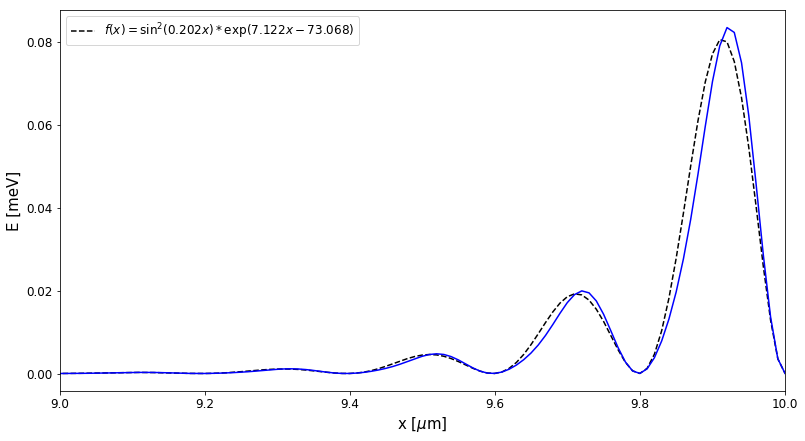

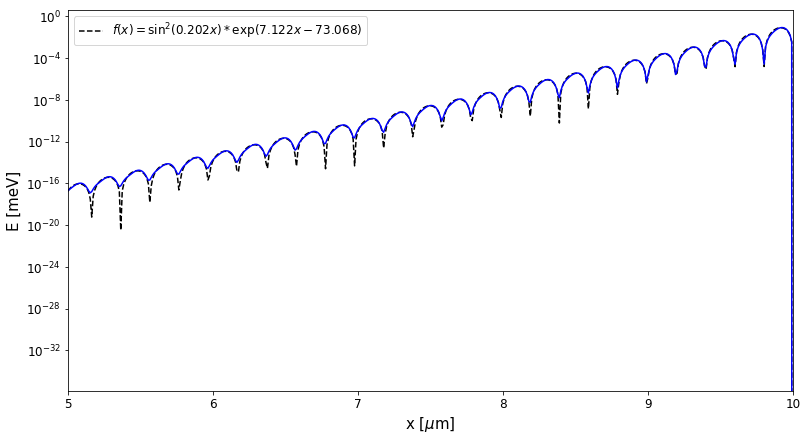

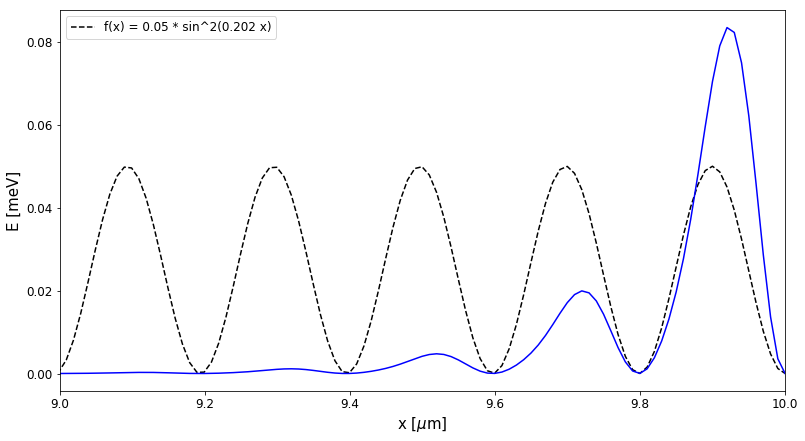

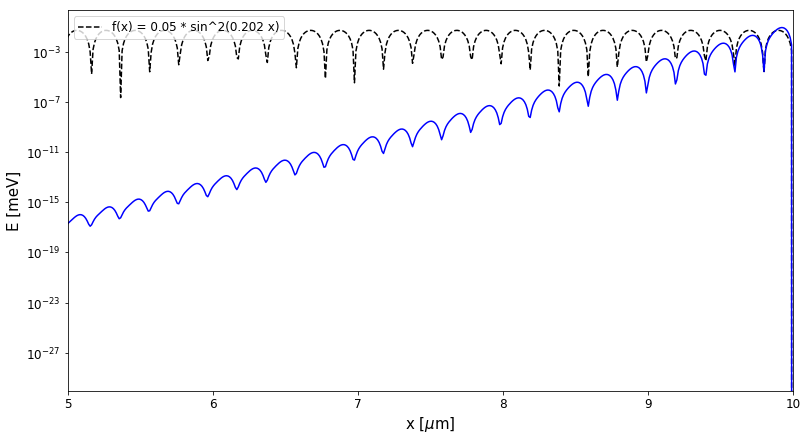

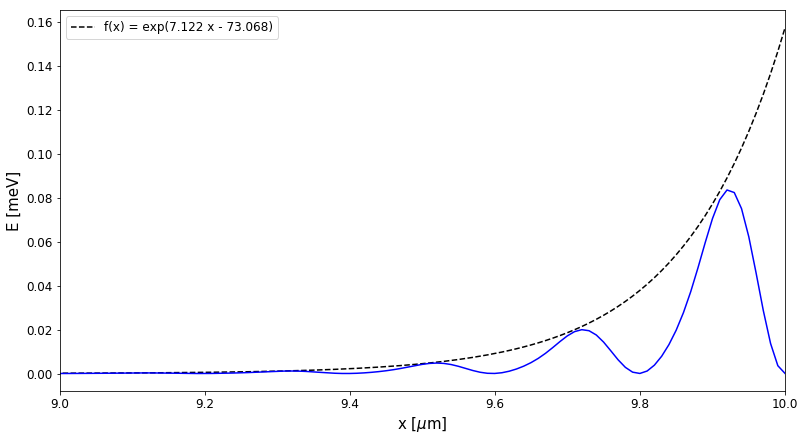

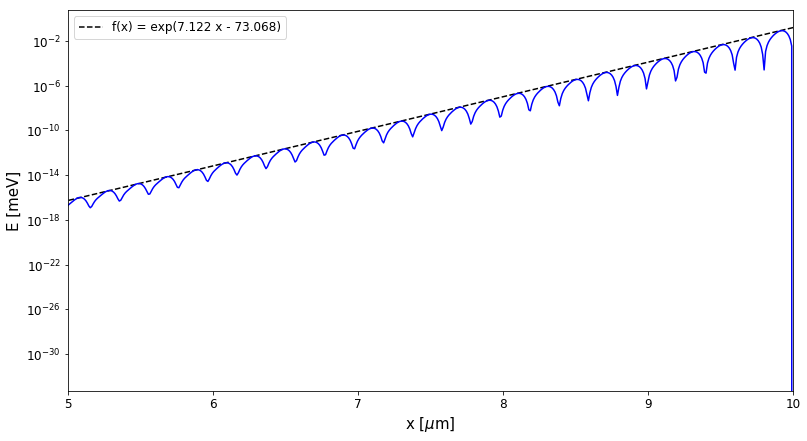

In [69]:
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='sin_and_exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='sin_and_exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='sin')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='sin')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='exp')

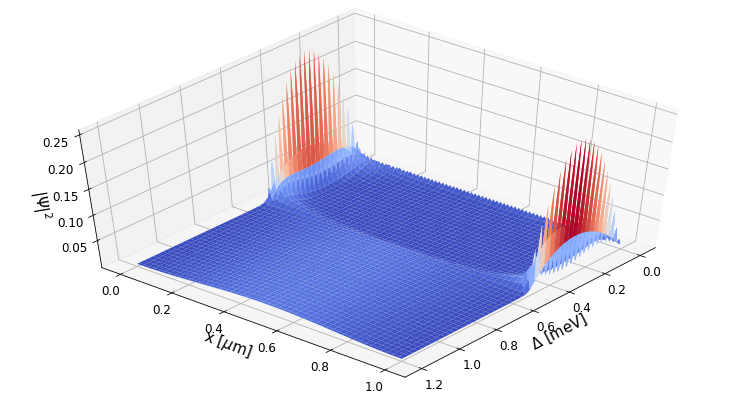

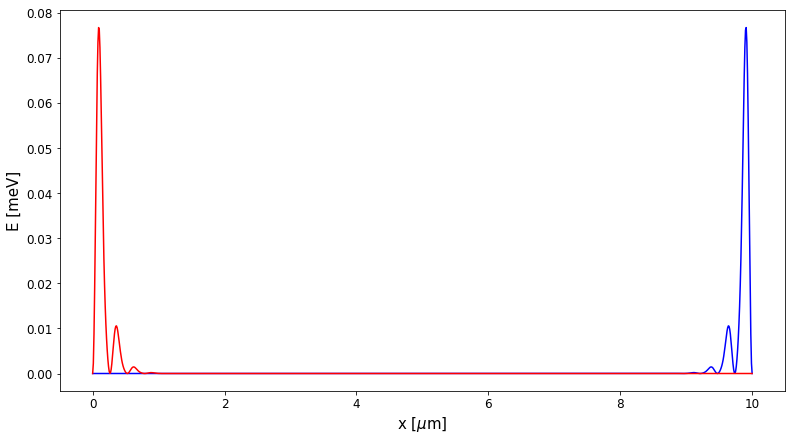

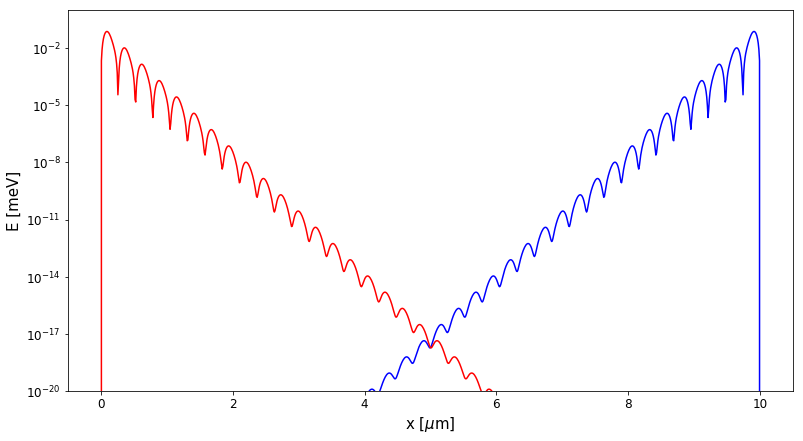

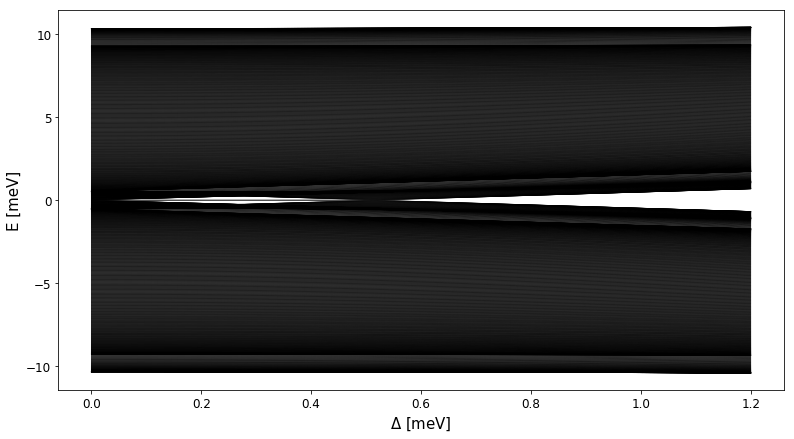

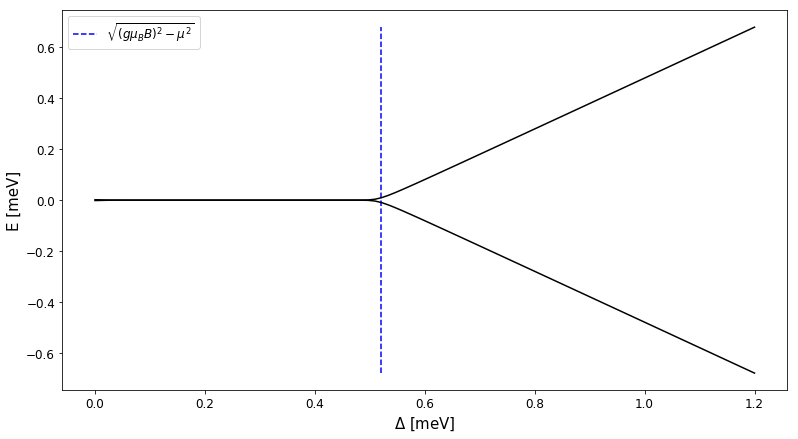

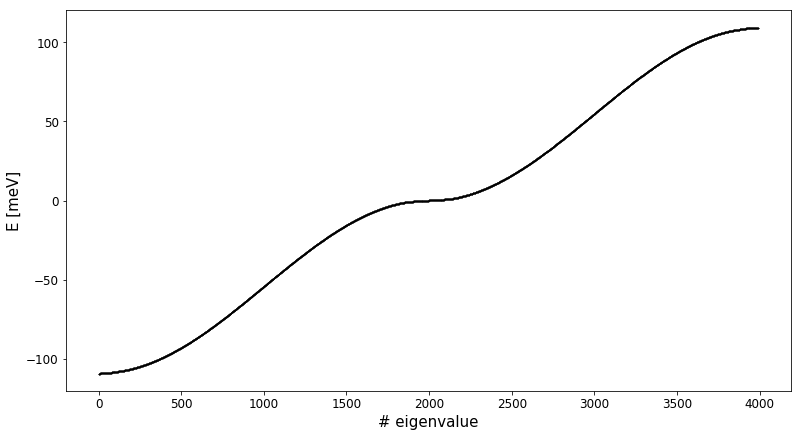

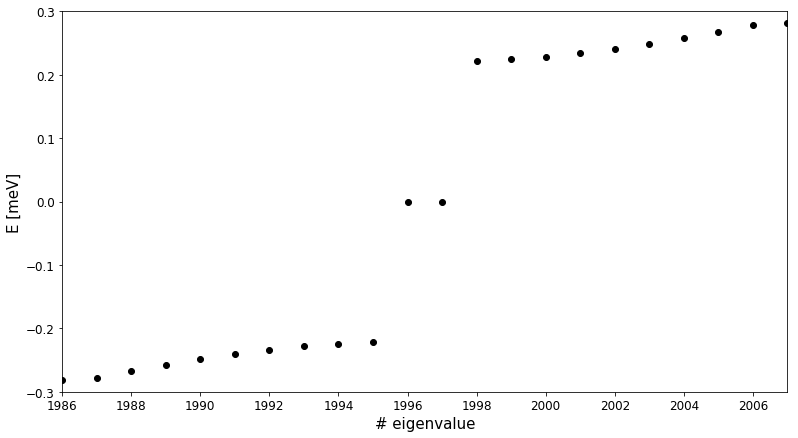

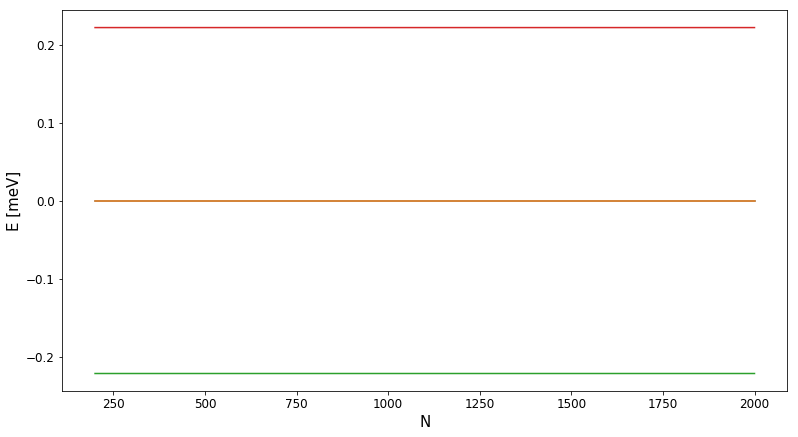

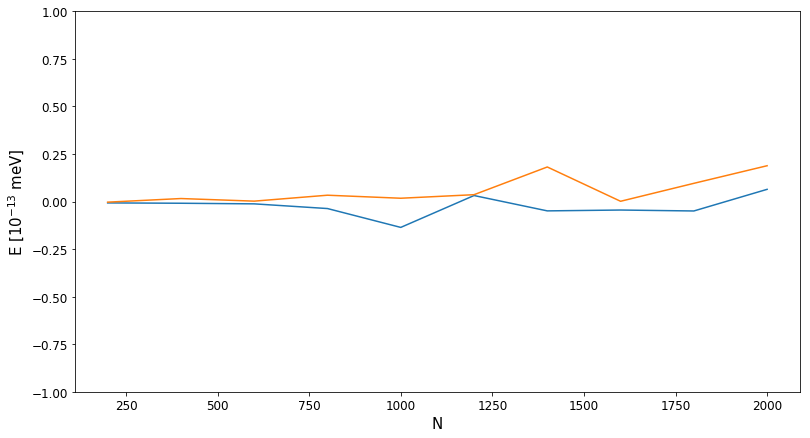

In [9]:
#InSb
m=0.014*m_e
g=45
B=0.2
start_delta=0
end_delta=1.2*x1
steps_delta=100
alpha=0.6*x2
mu=0
wire_length=10e-6
start_N=200
end_N=2000
steps_N=10
delta=0.3*x1

N=300
Plot_wf_H2_3d(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N)
N=1000
Plot_wf_H2(m,g,B,delta,alpha,mu,wire_length,N)
Plot_wf_H2(m,g,B,delta,alpha,mu,wire_length,N,True)
N=300
Plot_E_H2_delta(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N,only_lowest_E=False)
Plot_E_H2_delta(m,g,B,start_delta,end_delta,steps_delta,alpha,mu,wire_length,N,only_lowest_E=True)
N=1000
Plot_E_H2(m,g,B,delta,alpha,mu,wire_length,N,only_lowest_E=False)
Plot_E_H2(m,g,B,delta,alpha,mu,wire_length,N,only_lowest_E=True)
Plot_E_H2_convergence(m,g,B,delta,alpha,mu,wire_length,start_N,end_N,steps_N)
Plot_E_H2_convergence(m,g,B,delta,alpha,mu,wire_length,start_N,end_N,steps_N,only_lowest_E=True)

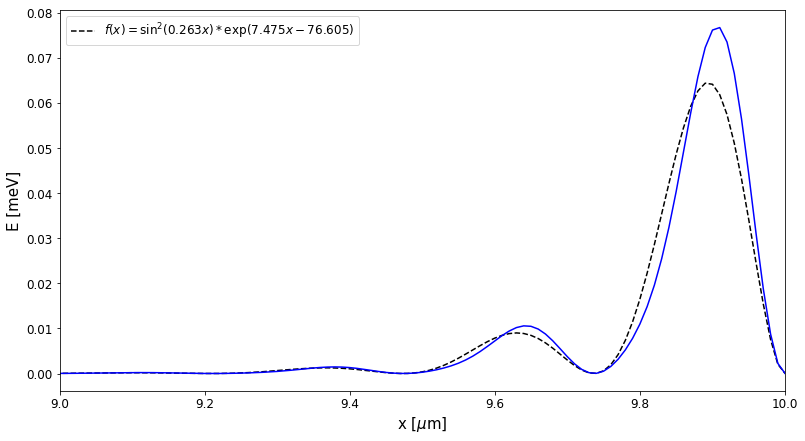

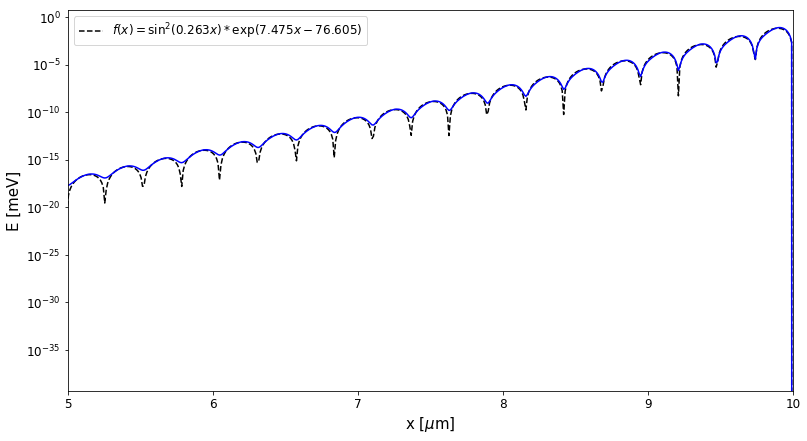

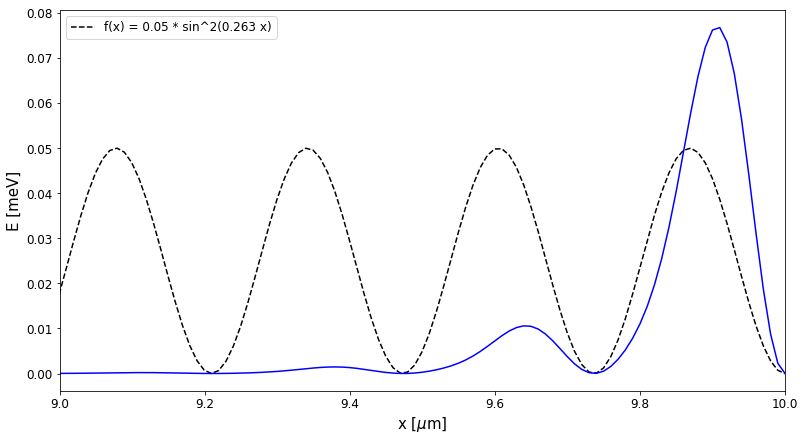

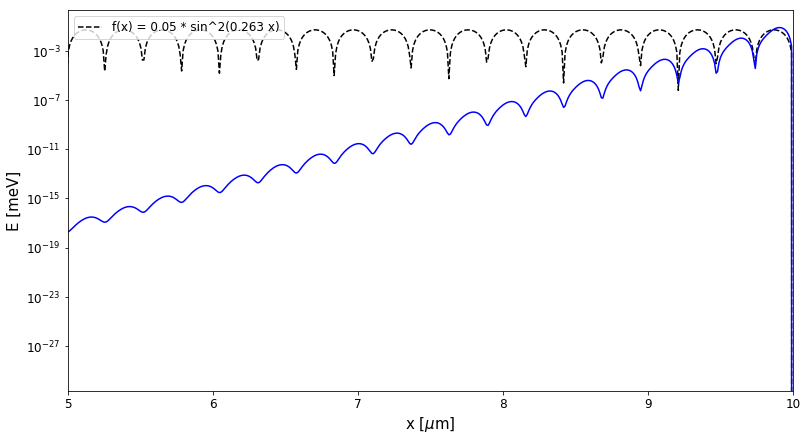

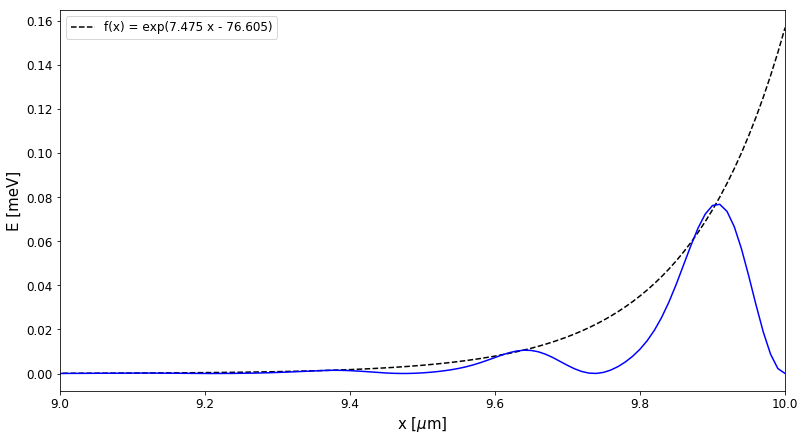

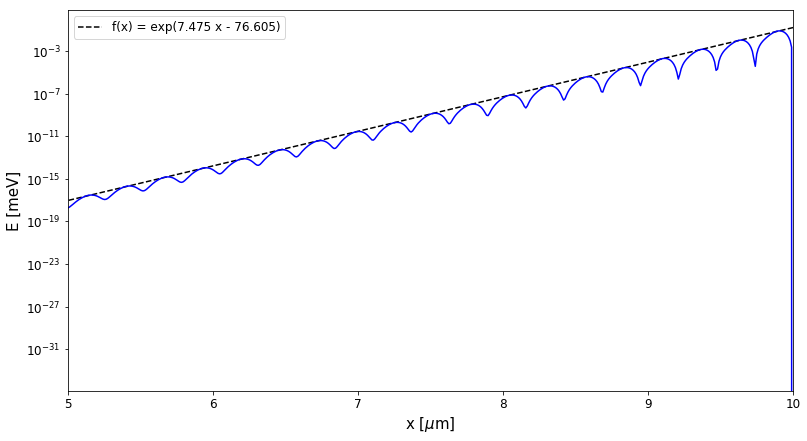

In [67]:
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='sin_and_exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='sin_and_exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='sin')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='sin')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=False,plot='exp')
Plot_wf_H2_fit(m,g,B,delta,alpha,mu,wire_length,N,log_scale=True,plot='exp')